# Diabetes Case study

## Phase:

Phase 0 — Data Preparation​

Phase 1 — Data Exploration​

Phase 2— Data Cleaning​

Phase 3— Feature Engineering

In [2]:
# import  Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading Data
data=pd.read_csv('diabetes.csv')

In [4]:
# Reading first 5 records
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,NaN
1,1,85,66,29,0,26.6,0.351,31,NaN


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     766 non-null float64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [8]:
data.groupby("Outcome").size()

Outcome
0.0    499
1.0    267
dtype: int64

Outcome
0.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

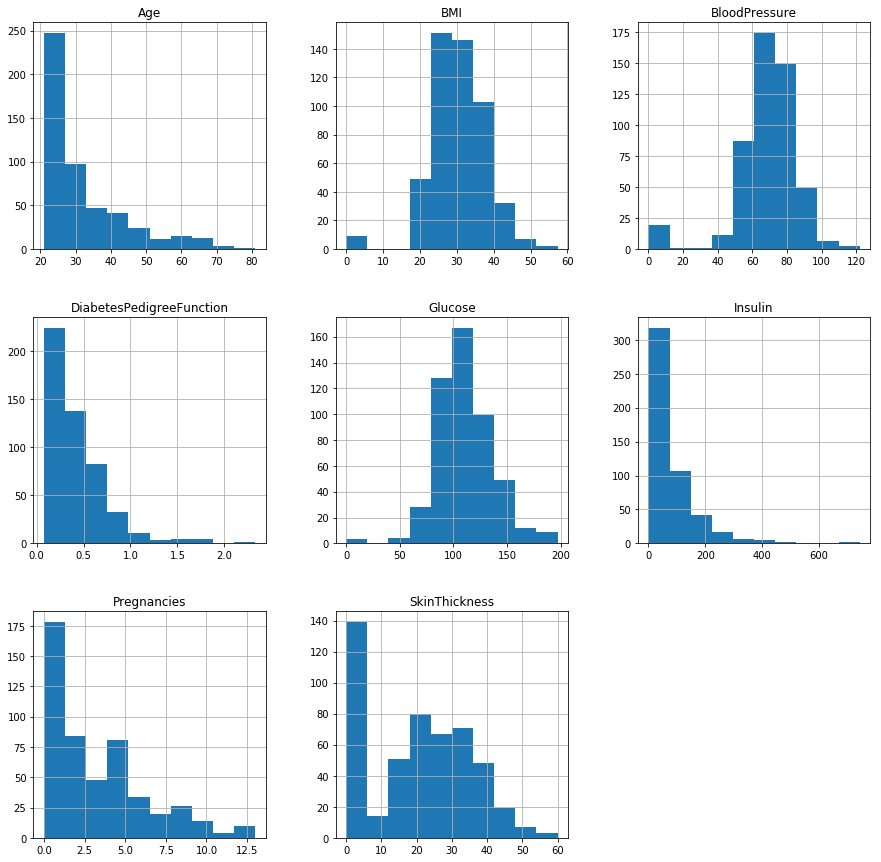

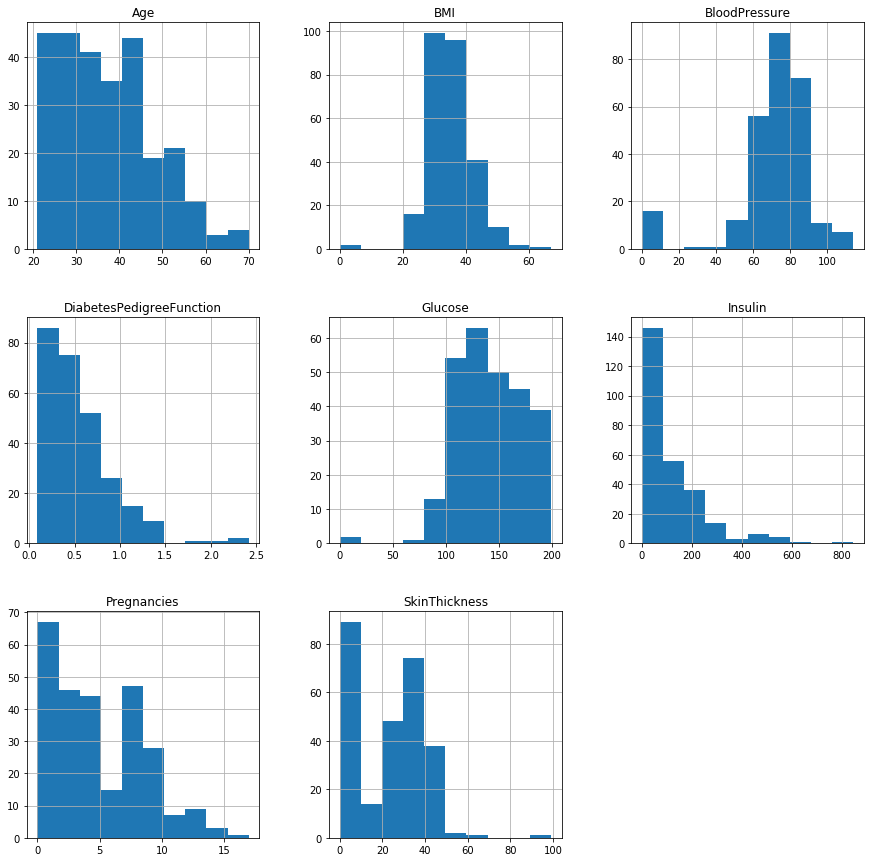

In [9]:
data.groupby('Outcome').hist(figsize=(15,15))

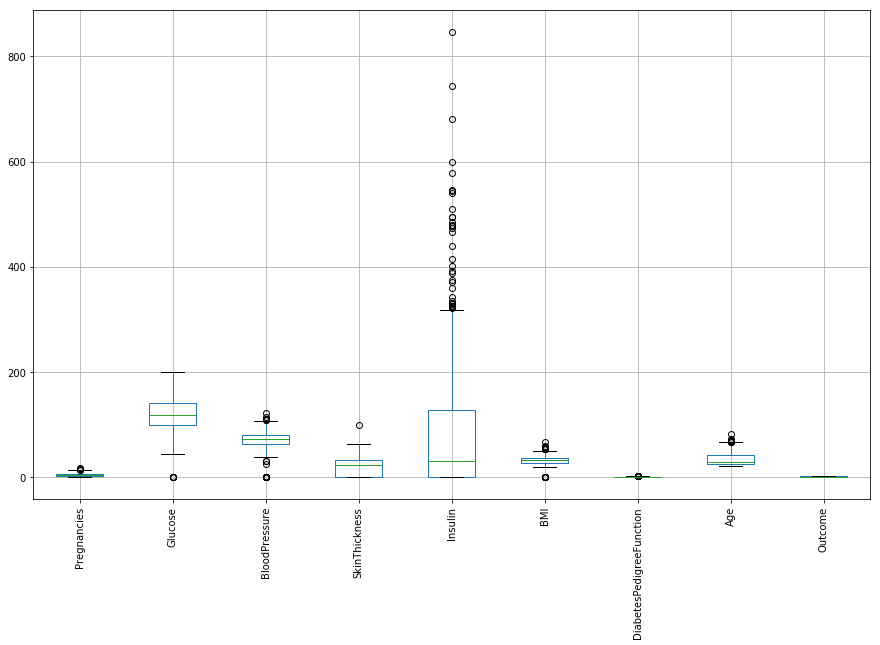

In [10]:
data.boxplot(rot=90,figsize=(15,9))

# Data Cleaning

In [11]:
# missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     2
dtype: int64

In [12]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [13]:
data['Outcome'].median()

0.0

In [14]:
# filling missing values with median

In [15]:
data.fillna(data.median(), inplace=True)

Outliers

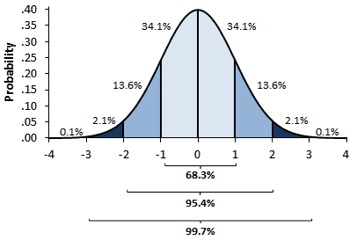

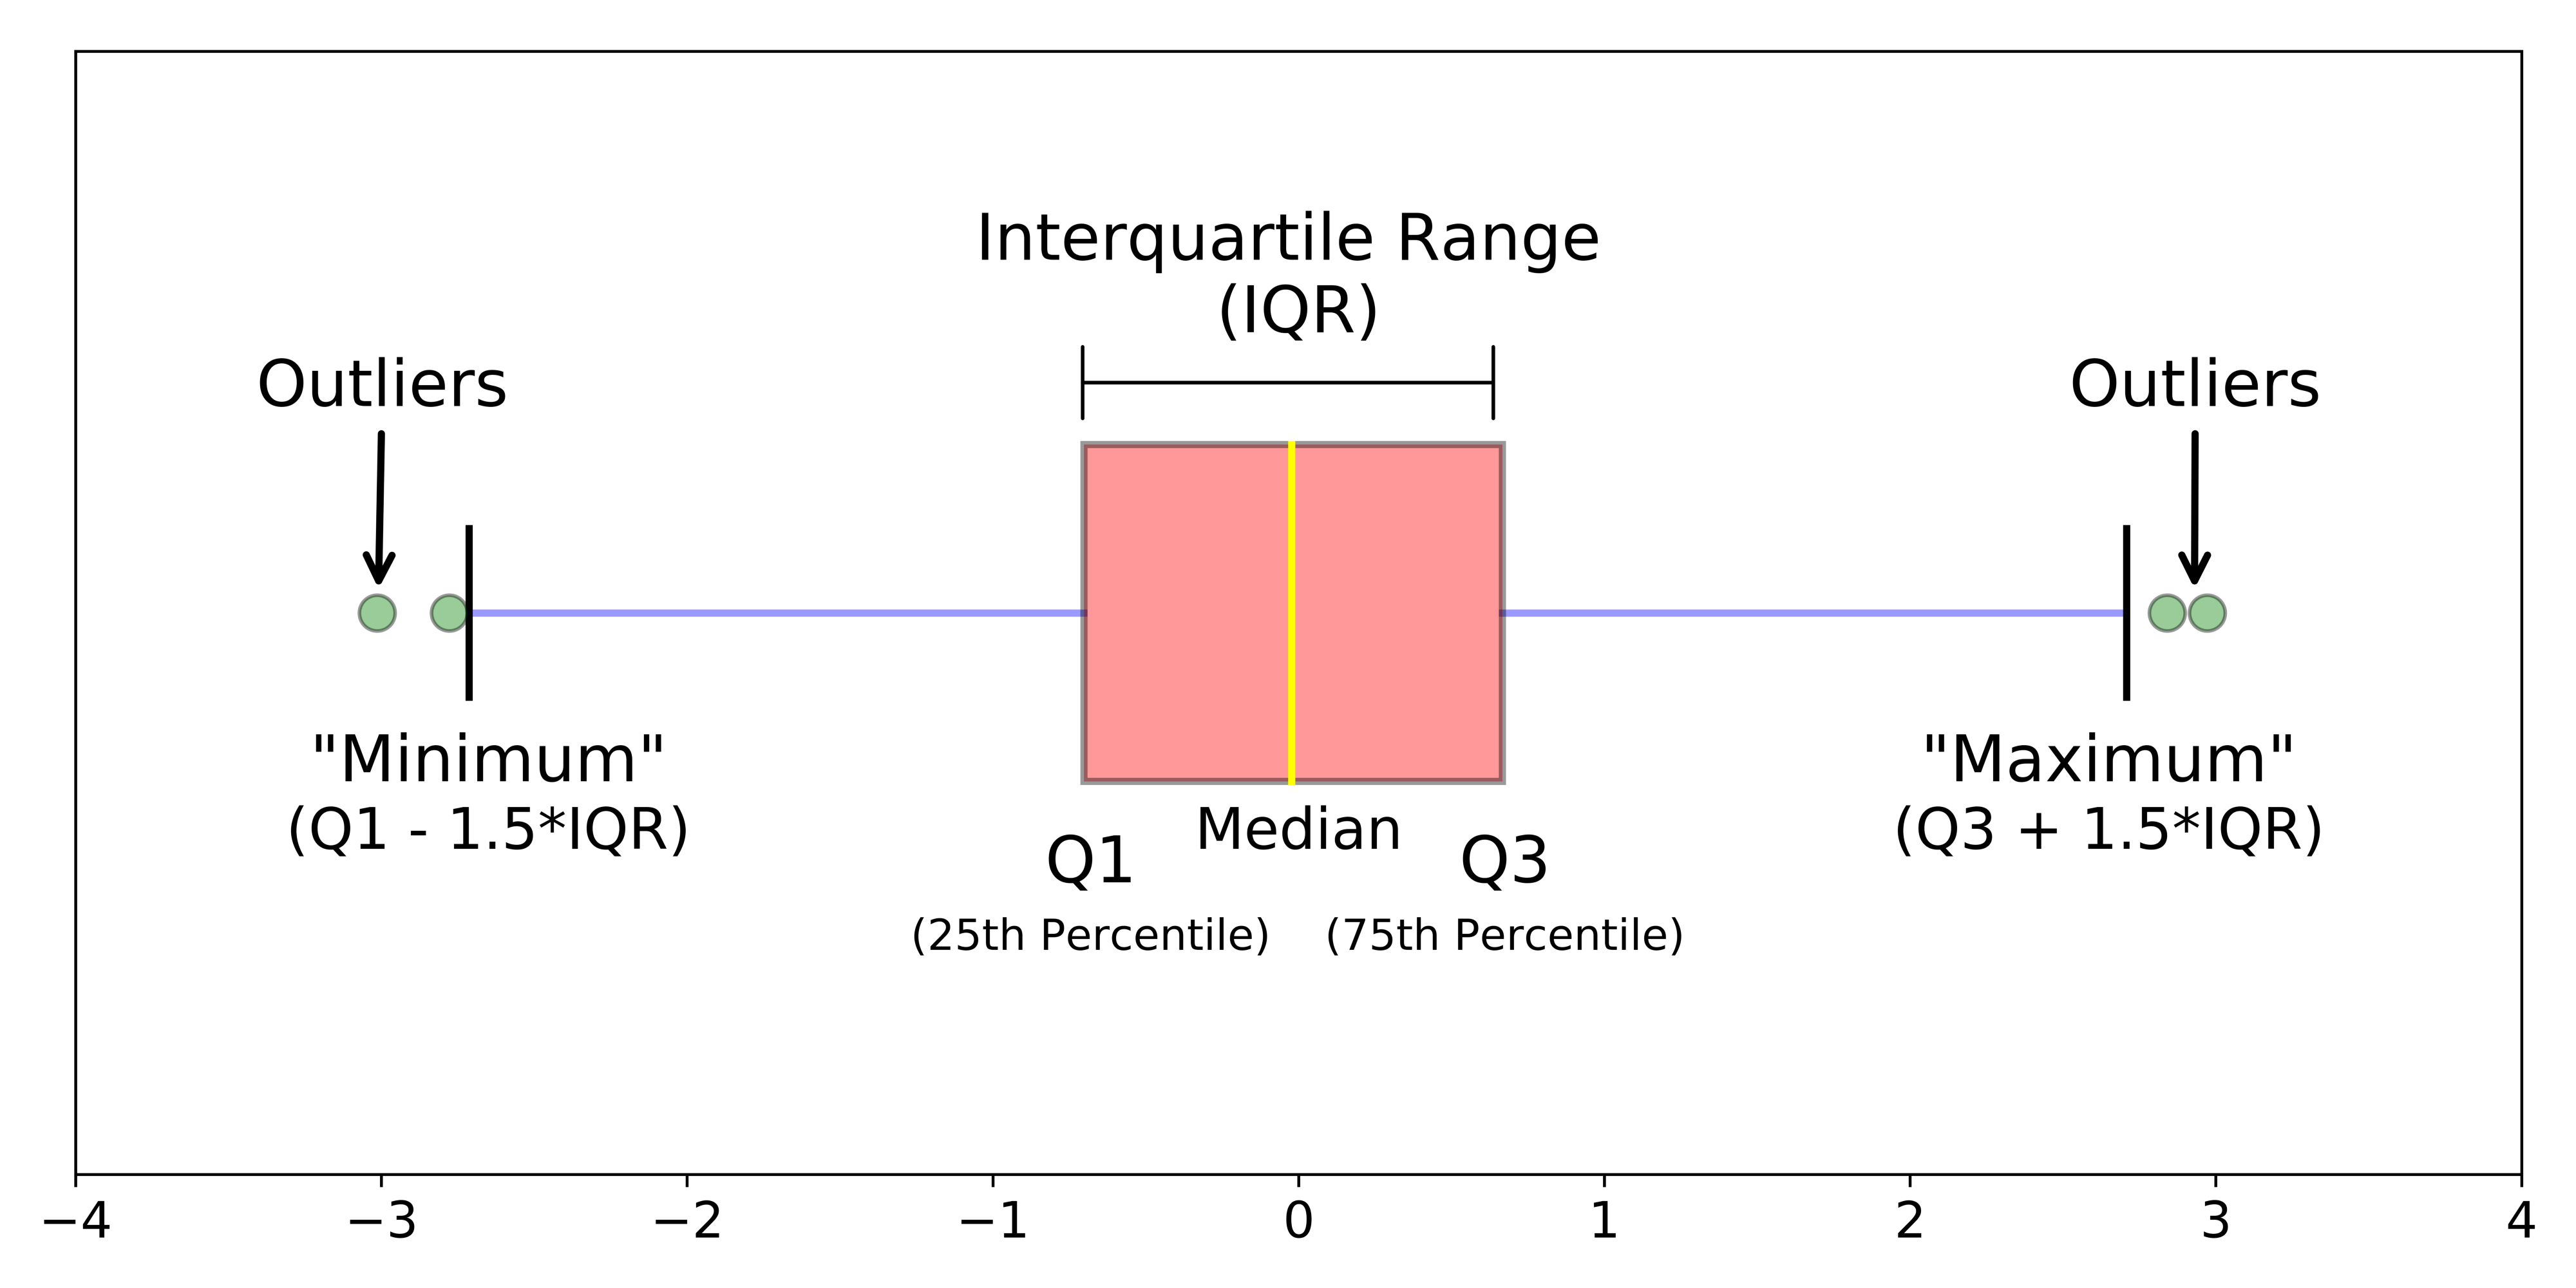

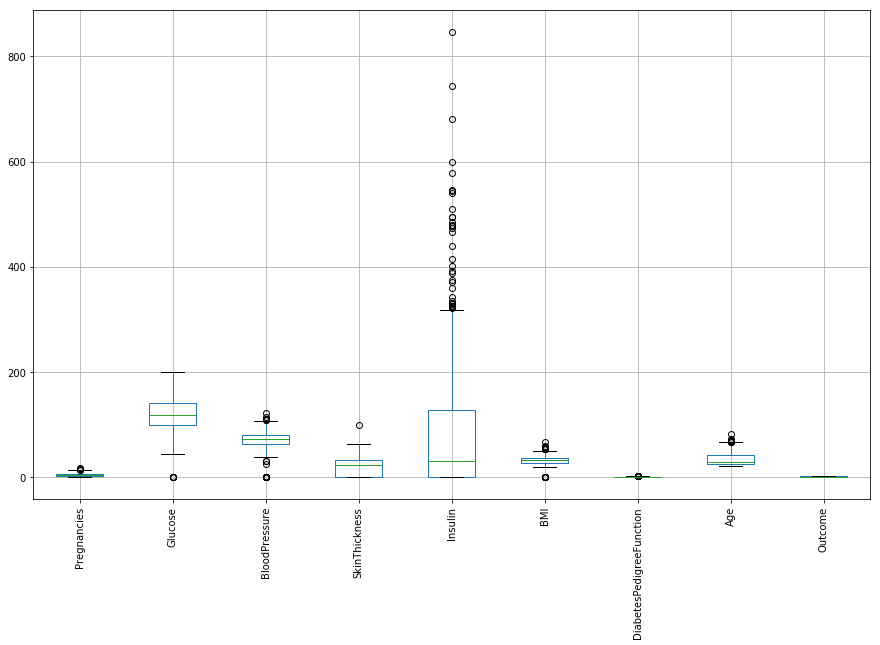

In [16]:
# outliers
data.boxplot(rot=90,figsize=(15,9))

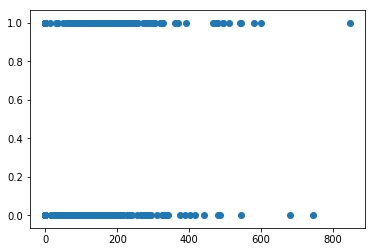

In [17]:
plt.scatter(data['Insulin'],data['Outcome'])

In [18]:
from scipy import stats

In [19]:
z=np.abs(stats.zscore(data['Insulin']))

In [20]:
print(z)

[0.69289057 0.69289057 0.69289057 0.12330164 0.76583594 0.69289057
 0.07120427 0.69289057 4.02192191 0.69289057 0.69289057 0.69289057
 0.69289057 6.65283938 0.82661621 0.69289057 1.30417549 0.69289057
 0.02778979 0.14066744 1.34758997 0.69289057 0.69289057 0.69289057
 0.57481223 0.30564246 0.69289057 0.52271486 0.26222798 0.69289057
 0.69289057 1.43441893 0.22401419 0.69289057 0.69289057 0.97422544
 0.69289057 0.69289057 0.69289057 1.10446888 0.08508786 0.69289057
 0.69289057 1.39100445 0.69289057 0.69289057 0.69289057 0.69289057
 0.69289057 0.69289057 0.01910689 0.38030632 0.49318397 1.9119782
 2.27665983 0.69289057 1.94670979 0.26222798 0.69289057 0.54008065
 0.69289057 0.69289057 0.69289057 0.41852011 0.69289057 0.69289057
 0.69289057 0.69289057 0.36294053 0.17539902 0.08857006 0.52271486
 0.69289057 1.65149133 0.69289057 0.69289057 0.69289057 0.69289057
 0.69289057 0.69289057 0.69289057 0.69289057 0.07640496 0.69289057
 0.69289057 0.39247142 0.69289057 0.07640496 0.26222798 0.69289

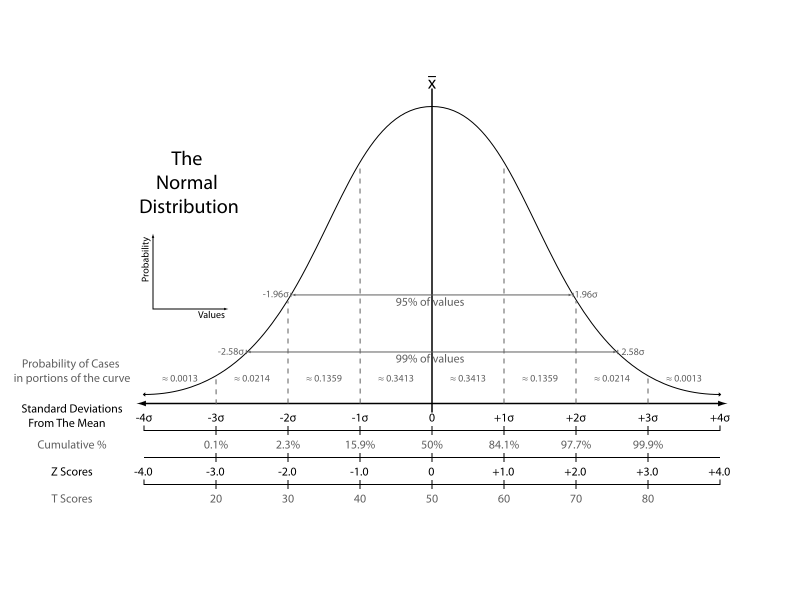

In [21]:
threshold=3
print(np.where(z>3))

(array([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
       584, 645, 655, 695, 753]),)


In [22]:
z[8]

4.021921913768968

IQR: Q3-Q1

In [23]:
Q1=data.quantile(0.25)

In [24]:
Q1

Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

In [25]:
Q3=data.quantile(0.75)

In [26]:
IQR=Q3-Q1

In [27]:
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [28]:
print(data<(Q1-1.5*IQR)) |  (data >(Q3+1.5*IQR))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
5          False    False          False          False    False  False   
6          False    False          False          False    False  False   
7          False    False           True          False    False  False   
8          False    False          False          False    False  False   
9          False    False          False          False    False   True   
10         False    False          False          False    False  False   
11         False    False          False          False    False  False   
12         False    False

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [ ]:
data.columns

In [30]:
x=data['Insulin']

In [32]:
y=x[x.between(x.quantile(0.25),x.quantile(0.75))]

In [38]:
import pandas as pd

In [39]:
y=pd.DataFrame(y)

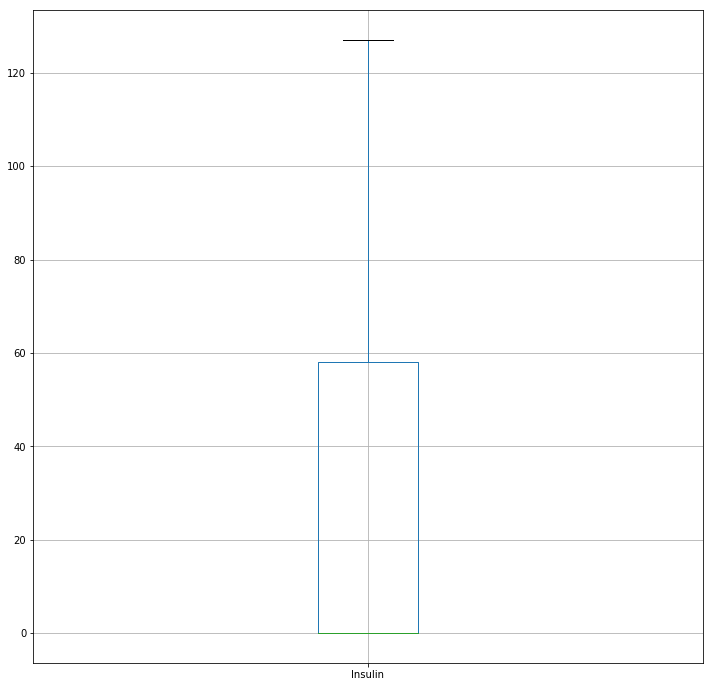

In [43]:
y.boxplot(figsize=(12,12))